# SMAI Assignment - 2

## Question 1: Naive Bayes and Clustering

### Part 1: Naive Bayes

[Files](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing)

You will be performing Sentiment Analysis on a product review dataset with reviews from customers and star rating belonging to four classes (1,2,4,5). You can use sklearn for this question. Your tasks are as follows:

1.   Clean the text by removing punctations and preprocess them using techniques such as stop word removal, stemming etc. You can explore anything!
1.  Create BoW features using the word counts. You can choose the words that form the features such that the performance is optimised. Use the train-test split provided in `train_test_index.pickle` and report any interesting observations based on metrics such as accurarcy, precision, recall and f1 score (You can use Classification report in sklearn).
1. Repeat Task 2 with TfIdf features.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving product_reviews.xlsx to product_reviews.xlsx
Saving train_test_index.pickle to train_test_index.pickle
Saving roberta_embeds.npy.gz to roberta_embeds.npy.gz
Saving product_reviews.csv to product_reviews.csv


In [3]:
import pickle
with open('train_test_index.pickle', 'rb') as handle:
    train_test_index_dict = pickle.load(handle)

In [4]:
import pandas as pd

data = pd.read_csv('product_reviews.csv')
data.head()

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,Went in for a lunch. Steak sandwich was delici...,5.0,1
2,This place has gone down hill. Clearly they h...,1.0,0
3,"Walked in around 4 on a Friday afternoon, we s...",1.0,0
4,Michael from Red Carpet VIP is amazing ! I rea...,4.0,1


In [5]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suraj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suraj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [8]:
print(train_test_index_dict.keys())

dict_keys(['train_index', 'test_index'])


In [9]:
# function to cleaning and preprocessing the input text data
def preprocess_text(text):
    # rirst we remove any punctuations from the text
    text = text.translate(str.maketrans('', '', string.punctuation))
    # next we convert the text to lowercase to ensure consistency
    text = text.lower()
    # then we tokenize the text into individual words
    tokens = nltk.word_tokenize(text)
    # now we remove any stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # then we perform stemming to reduce words to their root form
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    # finally we join the stemmed tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text


In [10]:
# calling function to clean and preprocess text data
data['clean_text'] = data['text'].apply(preprocess_text)

# splitting data into train and test sets
X_train = data.iloc[train_test_index_dict['train_index']]['clean_text']
y_train = data.iloc[train_test_index_dict['train_index']]['stars']
X_test = data.iloc[train_test_index_dict['test_index']]['clean_text']
y_test = data.iloc[train_test_index_dict['test_index']]['stars']

# creating Bag of Words (BoW) features
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

# training Naive Bayes classifier with BoW features
nb_classifier_bow = MultinomialNB()
nb_classifier_bow.fit(X_train_bow, y_train)

# predicting test set with BoW features
y_pred_bow = nb_classifier_bow.predict(X_test_bow)

# evaluating performance with BoW features
print("Classification Report with BoW features:")
print(classification_report(y_test, y_pred_bow))

Classification Report with BoW features:
              precision    recall  f1-score   support

         1.0       0.73      0.75      0.74      1149
         2.0       0.46      0.09      0.15       587
         4.0       0.48      0.49      0.49      1981
         5.0       0.79      0.85      0.81      5082

    accuracy                           0.70      8799
   macro avg       0.61      0.55      0.55      8799
weighted avg       0.69      0.70      0.69      8799



In [11]:
# creating TfIdf features
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

# Training Naive Bayes classifier with TfIdf features
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(X_train_tfidf, y_train)

# predicting test set with TfIdf features
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)

# evaluate performance with TfIdf features
print("Classification Report with TfIdf features:")
print(classification_report(y_test, y_pred_tfidf))


Classification Report with TfIdf features:
              precision    recall  f1-score   support

         1.0       0.92      0.11      0.20      1149
         2.0       0.00      0.00      0.00       587
         4.0       0.52      0.01      0.02      1981
         5.0       0.59      1.00      0.74      5082

    accuracy                           0.59      8799
   macro avg       0.51      0.28      0.24      8799
weighted avg       0.58      0.59      0.46      8799



C:\Users\suraj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suraj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Part 2: Clustering

You will be performing kmeans clustering on the same product reviews dataset from Part 1. In this question, instead of statistically computing features, you will use the embeddings obtained from a neural sentiment analysis model (huggingface: siebert/sentiment-roberta-large-english).

You can use sklearn for this question. Your tasks are as follows:


1. Perform kmeans clustering using sklearn. Try various values for number of clusters (k) and plot the elbow curve. For each value of k, plot WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster.
1. Perform task 1 with cluster initialisation methods [k-means++, forgy ("random" in sklearn)].
1. In this case, since the ground truth labels (star rating) are available we can evaluate the clustering using metrics like purity, nmi and rand score. Implement these metrics from scratch and evaluate the clustering. [Reference](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

In [12]:
import gzip
import numpy as np

f = gzip.GzipFile('roberta_embeds.npy.gz', "r")
embeds = np.load(f)
print(embeds.shape)

(26661, 1024)


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

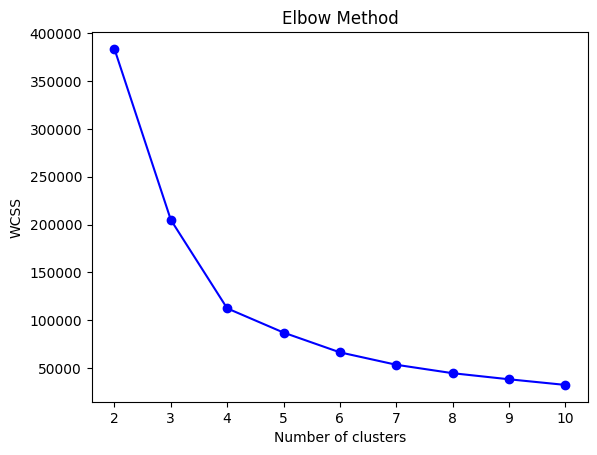

For k=2, WCSS=383779.7827026046
For k=3, WCSS=204916.6213998474
For k=4, WCSS=112261.47874445136
For k=5, WCSS=86921.4750520612
For k=6, WCSS=66230.38868562314
For k=7, WCSS=53232.14617226953
For k=8, WCSS=44411.39121594936
For k=9, WCSS=38042.48435596175
For k=10, WCSS=32138.316300259845


In [15]:
# Task 1: elbow curve for determining optimal k
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(embeds)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
k_values = range(2, 11)

plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# printing all values corresponding to k
for k, wcss in zip(range(2, 11), wcss):
    print(f'For k={k}, WCSS={wcss}')



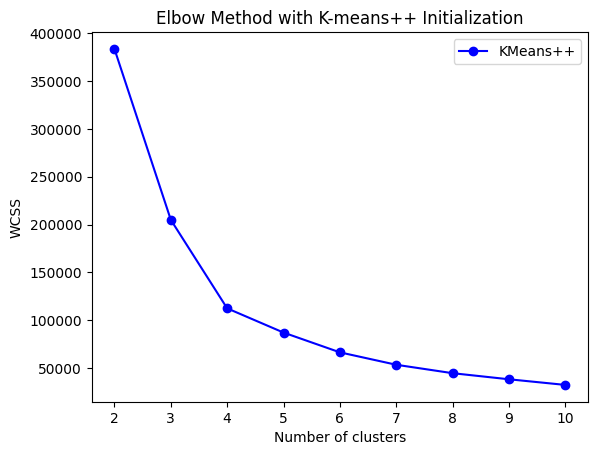

For k=2, WCSS=383779.78270260454
For k=3, WCSS=204916.62139984738
For k=4, WCSS=112261.47874445138
For k=5, WCSS=86921.4750520612
For k=6, WCSS=66230.38868562315
For k=7, WCSS=53232.14617226953
For k=8, WCSS=44411.39121594936
For k=9, WCSS=38042.48435596175
For k=10, WCSS=32138.316300259845


In [16]:
# Task 2: Elbow curve with K-means++ initialization method
wcss_kmeans_pp = []

for k in range(2, 11):  
    kmeans_pp = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans_pp.fit(embeds)
    wcss_kmeans_pp.append(kmeans_pp.inertia_)

k_values = range(2, 11)
plt.plot(k_values, wcss_kmeans_pp, marker='o', linestyle='-', color='b', label='KMeans++')
plt.title('Elbow Method with K-means++ Initialization')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()


# Print all values corresponding to k
for k, wcss in zip(range(2, 11), wcss_kmeans_pp):
    print(f'For k={k}, WCSS={wcss}')


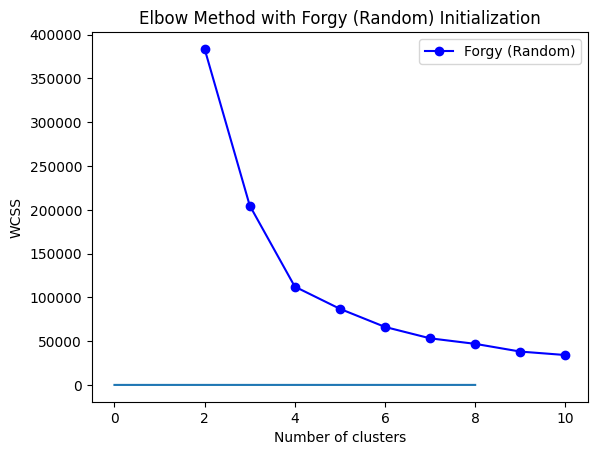

For k=2, WCSS=383779.78270260454
For k=3, WCSS=204916.6213998474
For k=4, WCSS=112261.47874445138
For k=5, WCSS=86921.53297653404
For k=6, WCSS=66230.52296821219
For k=7, WCSS=53234.08435667168
For k=8, WCSS=46916.41485779028
For k=9, WCSS=38095.78833755615
For k=10, WCSS=34136.21858178712


In [18]:
# Task 3: Elbow curve with Forgy (Random) initialization method
wcss_forgy = []

for k in range(2, 11): 
    kmeans_forgy = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
    kmeans_forgy.fit(embeds)
    wcss_forgy.append(kmeans_forgy.inertia_)


k_values = range(2, 11)
plt.plot(k_values, wcss_forgy, label='Forgy (Random)', marker='o', linestyle='-', color='b')
plt.plot(range(2, 11), )
plt.title('Elbow Method with Forgy (Random) Initialization')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()


# Print all values corresponding to k
for k, wcss in zip(range(2, 11), wcss_forgy):
    print(f'For k={k}, WCSS={wcss}')

In [7]:
#  function to calculate the purity of a clustering result.
def calculate_purity(labels, true_labels):
    # ensure true labels are of integer type
    true_labels = true_labels.astype(int)

    # get unique cluster labels
    cluster_labels = np.unique(labels)
    # total number of samples
    total_samples = len(labels)
    # initialize counter for correct predictions
    correct_predictions = 0

    # iterate over each cluster label
    for cluster_label in cluster_labels:
        # inding indices of samples belonging to the current cluster
        cluster_indices = np.where(labels == cluster_label)[0]
        # getting true labels of samples in the current cluster
        cluster_true_labels = true_labels[cluster_indices]
        # finding the dominant true label in the current cluster
        dominant_label = np.argmax(np.bincount(cluster_true_labels))
        # counting correct predictions by comparing cluster true labels with dominant label
        correct_predictions += np.sum(cluster_true_labels == dominant_label)

    # calculating and returning purity
    return correct_predictions / total_samples

In [8]:
# function to calculates the entropy
def calculate_entropy(labels):
    # count the occurrences of each label
    counter = Counter(labels)
    entropy = 0.0
    # iterate over each unique label
    for label, count in counter.items():
        # calculate the probability of the label
        probability = count / len(labels)
        # update entropy using the formula: -p * log2(p)
        entropy -= probability * np.log2(probability)
    return entropy

# function to calculates the mutual information between two sets of labels
def calculate_mutual_information(true_labels, predicted_labels):
    # count the occurrences of each label in both sets
    counter_true = Counter(true_labels)
    counter_pred = Counter(predicted_labels)
    mutual_information = 0.0
    total_samples = len(true_labels)

    # iterate over each unique true label
    for true_label, true_count in counter_true.items():
        # iterate over each unique predicted label
        for pred_label, pred_count in counter_pred.items():
            # finding the intersection count between true and predicted labels
            intersection_count = np.sum((true_labels == true_label) & (predicted_labels == pred_label))
            # if there is no intersection, continue to the next label pair
            if intersection_count == 0:
                continue
            # calculatung the probabilities of true, predicted, and intersection labels
            true_prob = true_count / total_samples
            pred_prob = pred_count / total_samples
            intersection_prob = intersection_count / total_samples
            # updating mutual information using the formula: p(intersection) * log2(p(intersection) / (p(true) * p(pred)))
            mutual_information += intersection_prob * np.log2((intersection_prob / (true_prob * pred_prob)))

    return mutual_information

#  function to calculates the normalized mutual information between two sets of labels
def calculate_nmi(true_labels, predicted_labels):
    # calculating entropy of true and predicted labels
    entropy_true = calculate_entropy(true_labels)
    entropy_pred = calculate_entropy(predicted_labels)
    # calculating mutual information between true and predicted labels
    mutual_information = calculate_mutual_information(true_labels, predicted_labels)

    # handling special cases where entropy or mutual information is zero
    if entropy_true == 0.0 and entropy_pred == 0.0:
        return 1.0
    elif mutual_information == 0.0:
        return 0.0
    else:
        # normalizing mutual information
        return mutual_information / np.sqrt(entropy_true * entropy_pred)


In [12]:
# function to calculates the Rand Index between two sets of labels
def calculate_rand_index(true_labels, predicted_labels):
    # initialize variables to store counts
    n = len(true_labels)
    a = 0  # True positives: pairs of samples that are in the same cluster in both true and predicted labels
    b = 0  # True negatives: pairs of samples that are in different clusters in both true and predicted labels
    c = 0  # False positives: pairs of samples that are in the same cluster in true labels but different clusters in predicted labels
    d = 0  # False negatives: pairs of samples that are in different clusters in true labels but same cluster in predicted labels
    
    # iterating over all pairs of samples
    for i in range(n):
        for j in range(i + 1, n):
            # checking if samples belong to the same cluster in true and predicted labels
            same_true_cluster = true_labels[i] == true_labels[j]
            same_pred_cluster = predicted_labels[i] == predicted_labels[j]
            # updating counts based on the comparison
            if same_true_cluster and same_pred_cluster:
                a += 1
            elif not same_true_cluster and not same_pred_cluster:
                b += 1
            elif same_true_cluster and not same_pred_cluster:
                c += 1
            elif not same_true_cluster and same_pred_cluster:
                d += 1
                
    # calculating and returning Rand Index
    rand_index = (a + b) / (a + b + c + d)
    return rand_index


In [10]:
#  ground truth labels 
true_labels = np.array(data[
    'stars'
])

In [13]:
#performing k-means clustering with different values of k
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(embeds)
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Evaluate clustering
    purity = calculate_purity(labels, true_labels)
    nmi = calculate_nmi(true_labels, labels)
    rand_score = calculate_rand_index(true_labels, labels)

    print(f"Number of Clusters: {k}")
    print(f"Purity: {purity}")
    print(f"NMI: {nmi}")
    print(f"Rand Score: {rand_score}")
    print()

C:\Users\suraj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 1
Purity: 0.5775102209219459
NMI: 0.0
Rand Score: 0.40569768581449966



C:\Users\suraj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 2
Purity: 0.7039495892877237
NMI: 0.5754266264308304
Rand Score: 0.7135190430892296



C:\Users\suraj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 3
Purity: 0.70683770301189
NMI: 0.558738791901934
Rand Score: 0.7166146240059509



C:\Users\suraj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 4
Purity: 0.7132140579873223
NMI: 0.5358546011063247
Rand Score: 0.7275735075323911



C:\Users\suraj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 5
Purity: 0.711113611642474
NMI: 0.4619497209943756
Rand Score: 0.7277174390930916



C:\Users\suraj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 6
Purity: 0.7113761674355801
NMI: 0.4579352041905857
Rand Score: 0.7279178070651341



C:\Users\suraj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 7
Purity: 0.7152769963617268
NMI: 0.4222522098327987
Rand Score: 0.7091616889819394



C:\Users\suraj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 8
Purity: 0.7151644724503957
NMI: 0.4177779305841942
Rand Score: 0.7089106022426614



C:\Users\suraj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 9
Purity: 0.7177900303814561
NMI: 0.39242951323181013
Rand Score: 0.6866330259846384



C:\Users\suraj\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Clusters: 10
Purity: 0.7170023630021379
NMI: 0.3865996682527135
Rand Score: 0.6809522454879501

